# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Cristian Javier Cázares Molina

- ID: A01741952

- My carreer: ITC / Engineering in Computer Technologies



# Importing libraries

In [1]:
#Data
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Clustering
from sklearn.cluster import KMeans

#Hide the memory leak warning caused by KMeans
import warnings
warnings.filterwarnings('ignore')

# A1 Load data

In [2]:
#In case it is needed to restore changes further in the code
def loadOriginal():
    path = "datasets/A01741952.csv"
    dataframe = pd.read_csv(path)
    #First column is only the row number starting at 0. It is not needed.
    dataframe = dataframe.drop(dataframe.columns[0], axis = 1)
    return dataframe

df = loadOriginal()
df

,x1,x2,x3,x4,x5,x6
0,7.035506,-2.972208,3.283340,-2.006544,1.496944,0.907858
1,8.171880,-1.028040,10.461204,8.055218,9.649339,-6.058528
2,-7.915290,4.798094,0.403140,4.315460,0.621354,-2.185748
3,8.775051,-4.432185,5.234102,-0.209761,4.034439,-2.013159
4,7.041615,-3.914975,7.908150,3.898934,1.649343,-1.577072
...,...,...,...,...,...,...
947,9.154443,3.176778,9.237698,5.948483,7.233401,-7.770731
948,-4.268578,7.281360,-2.575279,4.907175,-1.245962,-1.780823
949,8.500129,2.895391,10.396008,7.034949,5.933929,-6.296277
950,-3.345856,5.530232,-0.375926,6.488406,-0.531174,-3.134361


# A2 Data managment


Print the first 7 rows

In [3]:
df.head(7)

,x1,x2,x3,x4,x5,x6
0,7.035506,-2.972208,3.283340,-2.006544,1.496944,0.907858
1,8.171880,-1.028040,10.461204,8.055218,9.649339,-6.058528
2,-7.915290,4.798094,0.403140,4.315460,0.621354,-2.185748
3,8.775051,-4.432185,5.234102,-0.209761,4.034439,-2.013159
4,7.041615,-3.914975,7.908150,3.898934,1.649343,-1.577072
5,3.878740,-0.985407,3.627754,-0.735413,5.680760,2.354104
6,5.530010,-0.457767,3.675019,2.167821,6.052714,2.482227


Print the first 4 last rows

In [4]:
df.tail(4)

,x1,x2,x3,x4,x5,x6
948,-4.268578,7.281360,-2.575279,4.907175,-1.245962,-1.780823
949,8.500129,2.895391,10.396008,7.034949,5.933929,-6.296277
950,-3.345856,5.530232,-0.375926,6.488406,-0.531174,-3.134361
951,-7.403339,5.487552,0.022046,4.740832,1.257265,-2.867039


How many rows and columns are in your data?

Use the `shape` method


In [5]:
df.shape

(952, 6)

Print the name of all columns 

Use the `columns` method

In [6]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [7]:
df.dtypes

x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
x6    float64
dtype: object

What is the meaning of rows and columns?

#### Columns:
Variables involved on an experiment/phenomenon

#### Rows:
Observated value/medition of a certain variable

Print a statistical summary of your columns


In [8]:
df.sum()

x1    3142.595508
x2    1964.171451
x3    4390.183055
x4    3986.306129
x5    3400.457830
x6   -2555.321744
dtype: float64

### 1) What is the minumum and maximum values of each variable

#### Minimun:

In [9]:
df.min()

x1   -10.916279
x2    -6.184346
x3    -3.104366
x4    -3.445022
x5    -5.409742
x6   -10.463440
dtype: float64

#### Maximun

In [10]:
df.max()

x1    13.716393
x2     9.100933
x3    13.185785
x4    10.595277
x5    12.568373
x6     4.408424
dtype: float64

### 2) What is the mean and standar deviation of each variable

In [11]:
df.std()

x1    6.499936
x2    3.424670
x3    3.689551
x4    3.201092
x5    4.039860
x6    2.720229
dtype: float64

### 3) What the 25%, 50% and 75% represent?
They represent quantiles: regular groups of data from a distribution.\
These specific quantiles are quartiles, since they divide the distribution into four intervals.

#### Quartile 1 (lower)

In [12]:
df.quantile(q = 0.25)

x1   -4.626966
x2   -0.850812
x3    1.437152
x4    1.262101
x5    0.204379
x6   -5.024673
Name: 0.25, dtype: float64

#### Quartile 2 (middle)

In [13]:
df.quantile(q = 0.50)

x1    6.692501
x2    2.249891
x3    4.494767
x4    4.948710
x5    3.091672
x6   -2.253766
Name: 0.5, dtype: float64

#### Quartile 3 (upper)

In [14]:
df.quantile(q = 0.75)

x1    8.265452
x2    4.920273
x3    7.895580
x4    6.744969
x5    7.382380
x6   -0.566178
Name: 0.75, dtype: float64

Rename the columns using the same name with capital letters

In [15]:
df.columns = map(str.upper, df.columns)
df.head(1)

,X1,X2,X3,X4,X5,X6
0,7.035506,-2.972208,3.28334,-2.006544,1.496944,0.907858


Rename the columns to their original names

In [16]:
df.columns = map(str.lower, df.columns)
df.head(1)

,x1,x2,x3,x4,x5,x6
0,7.035506,-2.972208,3.28334,-2.006544,1.496944,0.907858


Use two different alternatives to get one of the columns

In [17]:
#Alternative 1
df["x1"]

0      7.035506
1      8.171880
2     -7.915290
3      8.775051
4      7.041615
         ...   
947    9.154443
948   -4.268578
949    8.500129
950   -3.345856
951   -7.403339
Name: x1, Length: 952, dtype: float64

In [18]:
#Alternative 2
df.iloc[:,0]

0      7.035506
1      8.171880
2     -7.915290
3      8.775051
4      7.041615
         ...   
947    9.154443
948   -4.268578
949    8.500129
950   -3.345856
951   -7.403339
Name: x1, Length: 952, dtype: float64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [19]:
df.iloc[62:73,1:3]

,x2,x3
62,3.262428,1.406132
63,4.469203,0.847569
64,4.746654,-0.328689
65,4.931941,8.479055
66,5.391910,2.220802
67,2.831850,7.671311
68,7.461236,0.219522
69,-2.146977,6.456170
70,8.262698,1.665479
71,1.409466,7.891038


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

#### Null:

In [20]:
df.iloc[:,1:3].isnull().sum()

x2    0
x3    0
dtype: int64

#### Not null:

In [21]:
df.iloc[:,1:3].notnull().sum()

x2    952
x3    952
dtype: int64

Discard the last column

#### Before:

In [22]:
df.head(1)

,x1,x2,x3,x4,x5,x6
0,7.035506,-2.972208,3.28334,-2.006544,1.496944,0.907858


#### After:

In [23]:
df = df.drop(columns = df.columns[-1])
df.head(1)

,x1,x2,x3,x4,x5
0,7.035506,-2.972208,3.28334,-2.006544,1.496944


## Questions 

### Based on the previos results, provide a description of your dataset

My dataset appears to be random floating values with a general range across all variables of about -11 to 14.\
There is a total of 952 readings, which are the last three digits of my student ID.\
There are 5 different variables with exactly that amount of readings and there is not a single null value.


# A3 Data visualization

### Plot in the same figure the histogram of the two variables

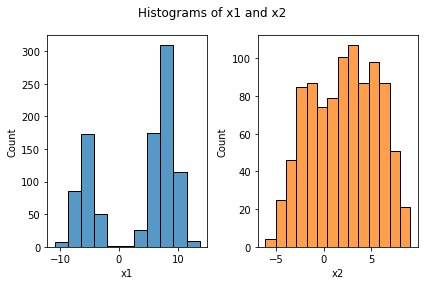

In [24]:
#I decided to go for the "side by side" figure over the overlapped one.

plt.subplot(1,2,1)
sns.histplot(df.iloc[:,0], color = sns.color_palette()[0])

plt.subplot(1,2,2)
sns.histplot(df.iloc[:,1], color = sns.color_palette()[1])

plt.suptitle("Histograms of x1 and x2")

plt.tight_layout() #Offset

plt.show()

#### Based on this plots, provide a description of your data:
Looking at the general shape of both histograms, we can see that x1 has a wider range, from -10 to 10. Which is exactly twice as the range of x2 (-5 to 5).

Nevertheless, x1 has the majority of its data at almost its extremes. Whilst x2 describes more of a gaussian bell distribution. This makes sense according to the before mentioned theory that the data set was generated by a random algorithm.

We could also even establish that x1 are two different gaussian bells for the lack of values at the middle of the range.



### Plot in the same figure the boxplot of the two variables 

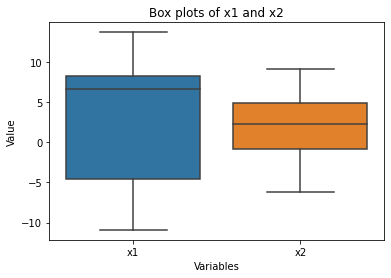

In [25]:
boxData = df.iloc[:,0:2]
colorArray = [sns.color_palette()[0],sns.color_palette()[1]]
box = sns.boxplot(data = boxData, palette = colorArray)
box.set(title = "Box plots of x1 and x2", ylabel = "Value", xlabel = "Variables")
plt.show()

### Scatter plot of the two variables

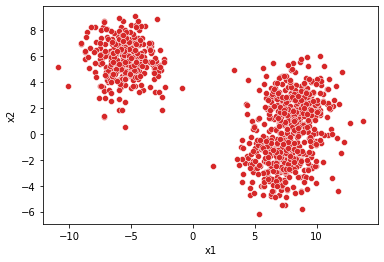

In [26]:
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:,1], color = sns.color_palette()[3])
plt.show()

### Questions 

#### Based on the previos plots, provide a description of yout dataset
The biggest thing to notice is how both variables are forming two big and concentrated groups.

Looking at the bigger group we could even say that there are in fact three groups in total, but in order to verify this we will need to perform further procedures.




# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [27]:
#Scatter and box plot use the same data
df = boxData
#Now df is only variables x1 and x2
df.head(1)

,x1,x2
0,7.035506,-2.972208


Add to your dataset a column with the assigned cluster to each data point

In [28]:
km = KMeans(n_clusters = 2)
yp = km.fit_predict(df[["x1", "x2"]])

print("Estimated cluster data:")
print(yp[0:50])
print("\t(First 50 estimations out of", len(yp), ")")
df["cluster"] = yp

Estimated cluster data:
[0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 0 0 0 1 1 1 1 0 1]
	(First 50 estimations out of 952 )


In [29]:
df.head(1)

,x1,x2,cluster
0,7.035506,-2.972208,0


Print the number associated to each cluster

In [30]:
print(df.cluster.unique())

[0 1]


Print the centroids

In [31]:
print(km.cluster_centers_)

[[ 7.75710277  0.22644182]
 [-5.58304293  5.72518031]]


Print the intertia metric

In [32]:
print(km.inertia_)

7241.531454171316


Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

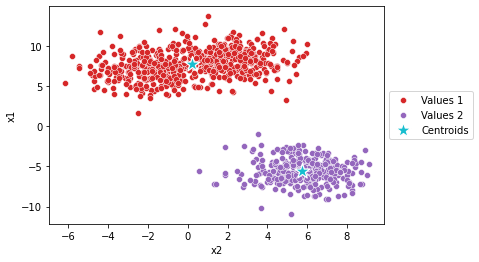

In [33]:
#Data grouped by cluster
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
#Values
#sns.scatterplot(y = df["x1"], x = df["x2"], label = "Values", color = sns.color_palette()[3])
sns.scatterplot(y = df0.x1, x = df0.x2, label = "Values 1", color = sns.color_palette()[3])
sns.scatterplot(y = df1.x1, x = df1.x2, label = "Values 2", color = sns.color_palette()[4])
#Centroids
sns.scatterplot(y = km.cluster_centers_[:,0], x = km.cluster_centers_[:,1],
                color = sns.color_palette()[9], marker = "*", label = "Centroids", s = 256)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))


plt.show()

### Questions 

#### Provides a detailed description of your results
It looks that two clusters could be the answer. Nevertheless there is still a change that one of those clusters is in fact 2. Therefore it is appropriate to find a wa to either prove or disprove this.

# A4 Elbow plot

Compute the Elbow plot

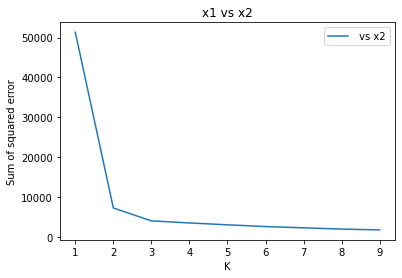

In [34]:
def elbowPlot(varA, varB):
    sse = []
    k_rng = range(1, 10)
    for k in k_rng:
        km = KMeans(n_clusters = k)
        km.fit_predict(df[[varA, varB]])
        sse.append(km.inertia_)
        
    plt.plot(k_rng, sse)
    plt.title(varA + " vs " + varB)
    plt.xlabel("K")
    plt.ylabel("Sum of squared error")
    plt.legend([" vs " + varB])
    

elbowPlot("x1","x2")
plt.show()


Pair plot for comparation

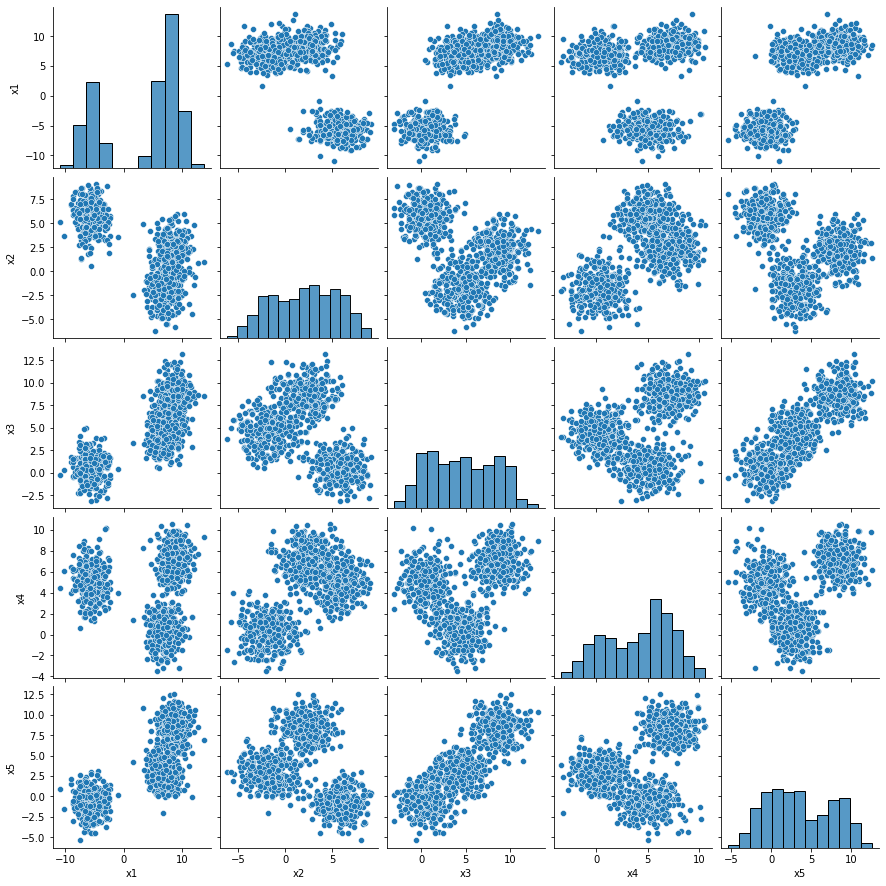

In [35]:
df = loadOriginal()
df = df.drop(columns = df.columns[-1])
sns.pairplot(df)
plt.show()

Since pairplot is suggesting three clusters, a set of elbow plots has been made for more information.

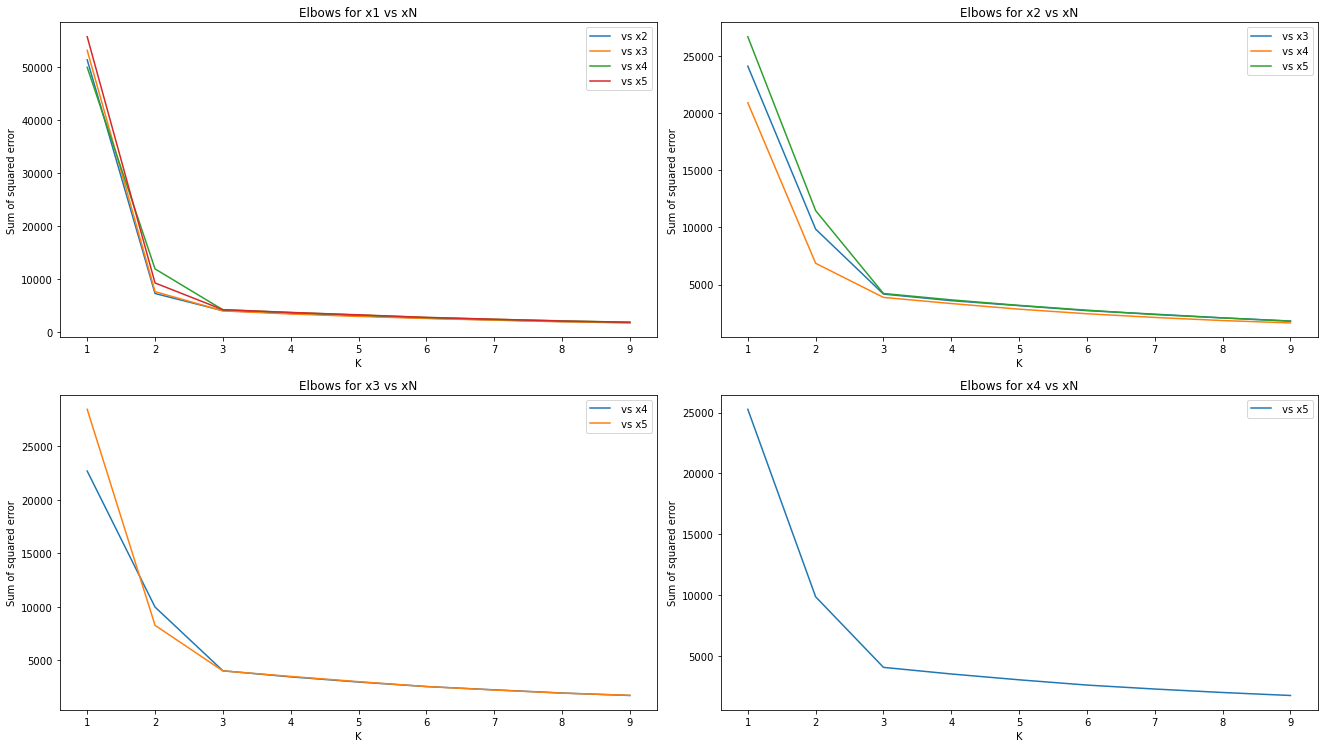

In [36]:
plt.figure(figsize=(18.5,10.5))

#x1
plt.subplot(2,2,1)
elbowPlot("x1","x2")
elbowPlot("x1","x3")
elbowPlot("x1","x4")
elbowPlot("x1","x5")
plt.tight_layout()
plt.legend([" vs x2"," vs x3", " vs x4", " vs x5"])
plt.title("Elbows for x1 vs xN")

#x2
plt.subplot(2,2,2)
elbowPlot("x2","x3")
elbowPlot("x2","x4")
elbowPlot("x2","x5")
plt.tight_layout()
plt.legend([" vs x3", " vs x4", " vs x5"])
plt.title("Elbows for x2 vs xN")


#x3
plt.subplot(2,2,3)
elbowPlot("x3","x4")
elbowPlot("x3","x5")
plt.tight_layout()
plt.title("Elbows for x3 vs xN")
plt.legend([" vs x4", " vs x5"])


#x4
plt.subplot(2,2,4)
elbowPlot("x4","x5")
plt.tight_layout()
plt.title("Elbows for x4 vs xN")
plt.legend([" vs x5"])

#Save and show
plt.savefig("elbowPlots.png")
plt.show()

## Questions 

#### What is the best number of clusters K? (argue your response)
The best number of clusters is 3. The key to determinate this relies on the elbow plots: If we try to visualize the derivative (slop) of the plot, the best elbow point will be the last big change on the derivative.

In most of the cases this las big change happens at 3 clusters.

#### Does this number of clusters agree with your inital guess? (argue your response)
No. During the formulation of my first guess I only used clusters for the first two variables. The results suggested that two clusters were good enough, since the elbow point was at 2 clusters.


In order to make a stronger argument I decided to run a pair plotting method, and the results showed up that I could be in fact 3 clusters.


To be more sure about that I make combinations of elbow plots and as it was argued on the last question, it makes more sense for the clusters to be 3.



### Visualiza 3 clusters:

Inertia = 4002.824212402604


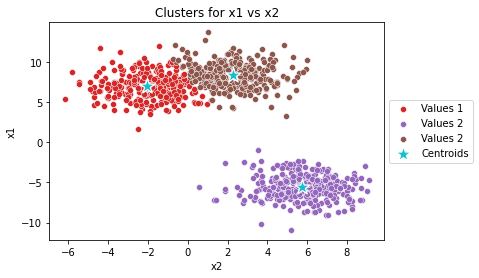

In [39]:
km = KMeans(n_clusters = 3)
yp = km.fit_predict(df[["x1", "x2"]])
df["cluster"] = yp

print("Inertia =", km.inertia_)

#Data grouped by cluster
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]
#Values
#sns.scatterplot(y = df["x1"], x = df["x2"], label = "Values", color = sns.color_palette()[3])
sns.scatterplot(y = df0.x1, x = df0.x2, label = "Values 1", color = sns.color_palette()[3])
sns.scatterplot(y = df1.x1, x = df1.x2, label = "Values 2", color = sns.color_palette()[4])
sns.scatterplot(y = df2.x1, x = df2.x2, label = "Values 2", color = sns.color_palette()[5])
#Centroids
sns.scatterplot(y = km.cluster_centers_[:,0], x = km.cluster_centers_[:,1],
                color = sns.color_palette()[9], marker = "*", label = "Centroids", s = 256)

plt.legend(loc='center left',bbox_to_anchor=(1, 0.5))
plt.title("Clusters for x1 vs x2")
plt.show()